# PyTorch version of deeplearning.ai Course 1 Week 3 PA

---


## Dataset ##

a "flower" 2-class dataset

The data looks like a "flower" with some red (label y=0) and some blue (y=1) points. 

You have:
    - a numpy-array (matrix) X that contains your features (x1, x2)
    - a numpy-array (vector) Y that contains your labels (red:0, blue:1).

---

## Neural Network with a single hidden layer.

**Here is our model**:
<img src="images/classification_kiank.png" style="width:600px;height:300px;">

**Mathematically**:

For one example $x^{(i)}$:
$$z^{[1] (i)} =  W^{[1]} x^{(i)} + b^{[1] (i)}\tag{1}$$ 
$$a^{[1] (i)} = \tanh(z^{[1] (i)})\tag{2}$$
$$z^{[2] (i)} = W^{[2]} a^{[1] (i)} + b^{[2] (i)}\tag{3}$$
$$\hat{y}^{(i)} = a^{[2] (i)} = \sigma(z^{ [2] (i)})\tag{4}$$
$$y^{(i)}_{prediction} = \begin{cases} 1 & \mbox{if } a^{[2](i)} > 0.5 \\ 0 & \mbox{otherwise } \end{cases}\tag{5}$$

Given the predictions on all the examples, you can also compute the cost $J$ as follows: 
$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large\left(\small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right)  \large  \right) \small \tag{6}$$


---

## The general methodology to build a Neural Network is to:

    1. Define the neural network structure ( # of input units,  # of hidden units, etc). 
    2. Initialize the model's parameters
    3. Loop:
        - Implement forward propagation
        - Compute loss
        - Implement backward propagation to get the gradients
        - Update parameters (gradient descent)

In [1]:
# Package imports
import torch
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
from testCases_v2 import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import sigmoid, load_planar_dataset, load_extra_datasets

%matplotlib inline

np.random.seed(1) # set a seed so that the results are consistent


print(torch.nn.__file__)


/anaconda3/lib/python3.6/site-packages/torch/nn/__init__.py


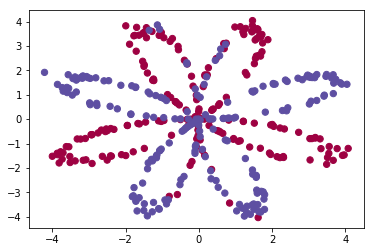

In [2]:
X, Y = load_planar_dataset()
plt.scatter(X[0, :], X[1, :], c=Y.reshape(400,), s=40, cmap=plt.cm.Spectral);

In [11]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    input = np.c_[xx.ravel(), yy.ravel()]
    input = Variable(torch.from_numpy(input).float())

    # Predict the function value for the whole grid
    Z = model(input).data.numpy()
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)

In [12]:
model = torch.nn.Sequential(
    torch.nn.Linear(2,16),
    torch.nn.Tanh(),
    torch.nn.Linear(16,8),
    torch.nn.Tanh(),
    torch.nn.Linear(8,1),
    torch.nn.Sigmoid()
)

loss_fn = torch.nn.BCELoss()

x = Variable(torch.from_numpy(X.T).float())
y = Variable(torch.from_numpy(Y.T).float(), requires_grad=False)

In [13]:
learning_rate = 1.2

for t in range(2000):

    y_pred = model(x)    
    loss = loss_fn(y_pred, y)

    if t % 500 == 0:
        print("iteration: " + str(t) + ", loss: " + str(loss.data.item()))
    
    model.zero_grad()
    loss.backward()

    for param in model.parameters():
        param.data -= learning_rate * param.grad.data

iteration: 0, loss: 0.7405349612236023
iteration: 500, loss: 0.20639684796333313
iteration: 1000, loss: 0.1823781430721283
iteration: 1500, loss: 0.17426662147045135


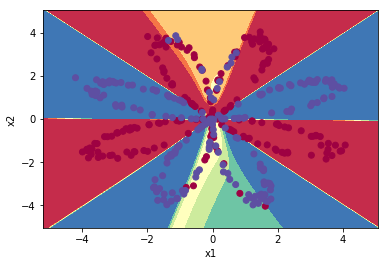

In [14]:
plot_decision_boundary(model, X, Y.T.ravel())